<a href="https://colab.research.google.com/github/linlih/ML_By_NTU_Hung-yi-Lee/blob/master/ml_2019spring_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作业说明

投影片： https://docs.google.com/presentation/d/1_UOEquMW4URIuTtrKGqwSPP4qtKIb7osT9ysTQ3Flmo/edit#slide=id.p

Kaggle地址：https://www.kaggle.com/c/ml2019spring-hw3

任务：给定图片的信息，确定图片的表情：0：生氣, 1：厭惡, 2：恐懼, 3：高興, 4：難過, 5：驚訝, 6：中立

要求，使用CNN model

# 下载数据

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [2]:
!kaggle competitions download -c ml2019spring-hw3

 84% 65.0M/77.2M [00:01<00:00, 51.0MB/s]
100% 77.2M/77.2M [00:01<00:00, 66.5MB/s]
  0% 0.00/48.0k [00:00<?, ?B/s]
100% 48.0k/48.0k [00:00<00:00, 50.4MB/s]
 26% 5.00M/19.3M [00:00<00:01, 12.4MB/s]
100% 19.3M/19.3M [00:00<00:00, 39.3MB/s]


In [3]:
!unzip test.csv.zip
!unzip train.csv.zip

Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               


# 数据处理

In [0]:
import numpy as np
import pandas as pd
data = pd.read_csv('train.csv')

In [5]:
data.iloc[0]

label                                                      0
feature    70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
Name: 0, dtype: object

In [0]:
x = np.zeros((data.shape[0], 48*48), dtype=float)
y = np.zeros(data.shape[0], dtype=int)

for i in range(data.shape[0]):
  x[i] = np.array(data['feature'][i].split()) # 48 * 48
  y[i] = data['label'][i]

In [0]:
pic = np.array(data['feature'][0].split()).reshape(48,48) # 48 * 48

In [0]:
x

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 74.,  81.,  87., ..., 188., 187., 187.],
       [222., 227., 203., ..., 136., 136., 134.],
       [195., 199., 205., ...,   6.,  15.,  38.]])

In [0]:
import matplotlib.pyplot as plt

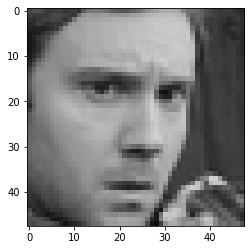

In [0]:
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image

# fromarray的图片载入模式：https://pillow-zh-cn.readthedocs.io/zh_CN/latest/handbook/concepts.html#concept-modes
im = Image.fromarray(np.uint8(pic), mode='P')
plt.imshow(im)
plt.show()

# 模型设计

In [7]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
x_noraml = x/255
x_train = x_noraml[:20000]
x_val = x_noraml[20000:]

y_1hot = to_categorical(y)
y_val = y_1hot[20000:]
y_train = y_1hot[:20000]

In [0]:
x_train = x_train.reshape(20000, 48, 48, 1)
x_val = x_val.reshape(-1, 48, 48, 1)

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
       loss='categorical_crossentropy',
       metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 8709 samples
Epoch 1/10
20000/20000 [==============================] - 5s 229us/step - loss: 4.8347 - accuracy: 0.2419 - val_loss: 1.8112 - val_accuracy: 0.2534
Epoch 2/10
20000/20000 [==============================] - 4s 222us/step - loss: 1.8535 - accuracy: 0.2483 - val_loss: 1.8054 - val_accuracy: 0.2544
Epoch 3/10
20000/20000 [==============================] - 4s 222us/step - loss: 1.7682 - accuracy: 0.2670 - val_loss: 1.7181 - val_accuracy: 0.3132
Epoch 4/10
20000/20000 [==============================] - 4s 224us/step - loss: 1.6679 - accuracy: 0.3323 - val_loss: 1.6027 - val_accuracy: 0.3618
Epoch 5/10
20000/20000 [==============================] - 4s 223us/step - loss: 1.5917 - accuracy: 0.3717 - val_loss: 1.6038 - val_accuracy: 0.3711
Epoch 6/10
20000/20000 [==============================] - 4s 222us/step - loss: 1.5411 - accuracy: 0.3929 - val_loss: 1.5404 - val_accuracy: 0.3950
Epoch 7/10
20000/20000 [==============================] - 4s 22

In [0]:
from keras.utils.np_utils import to_categorical
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras import Model
from keras.optimizers import Adam

y_1hot = to_categorical(y)
y_val = y_1hot[20000:]
y_train = y_1hot[:20000]

x_noraml = x/255
x_train = x_noraml[:20000]
x_val = x_noraml[20000:]

x_val = x_val.reshape(-1,48,48,1)
x_train = x_train.reshape(-1,48,48,1)

x_train = np.repeat(x_train, 3, -1)
x_val = np.repeat(x_val, 3, -1)

In [0]:
base_model = ResNet50(include_top=False,
                 weights="imagenet",
                 input_shape=(48,48,3)
                 )
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
                 
adam = Adam(lr=3e-4)

model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:
!nvidia-smi

Sat Apr 18 10:04:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    30W /  70W |    475MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 8709 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 1.7200 - accuracy: 0.3866 - val_loss: 2.1286 - val_accuracy: 0.1691
Epoch 2/10
20000/20000 [==============================] - 32s 2ms/step - loss: 1.1397 - accuracy: 0.5745 - val_loss: 2.0346 - val_accuracy: 0.1369
Epoch 3/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.8433 - accuracy: 0.6934 - val_loss: 1.9391 - val_accuracy: 0.1535
Epoch 4/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6148 - accuracy: 0.7801 - val_loss: 1.9449 - val_accuracy: 0.2019
Epoch 5/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.4329 - accuracy: 0.8494 - val_loss: 1.7852 - val_accuracy: 0.4030
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.3361 - accuracy: 0.8820 - val_loss: 1.7361 - val_accuracy: 0.5061
Epoch 7/10
20000/20000 [==============================] - 32s 2ms/ste